### Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

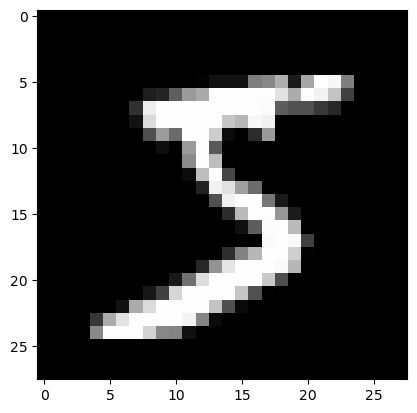

In [3]:
plt.imshow(x_train[0], cmap='gray')

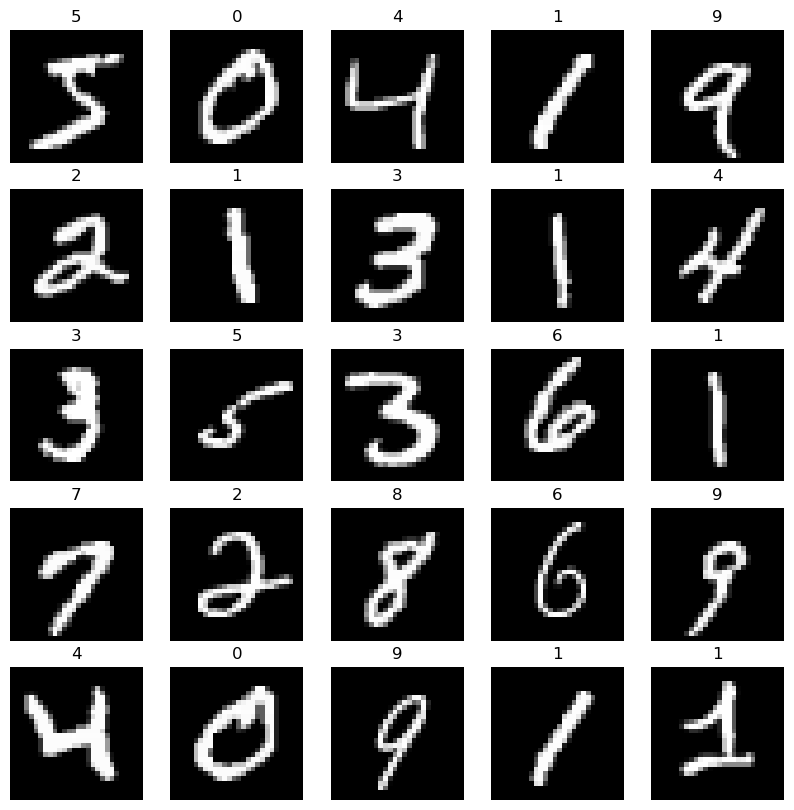

In [4]:
# printing first 25 x_train
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

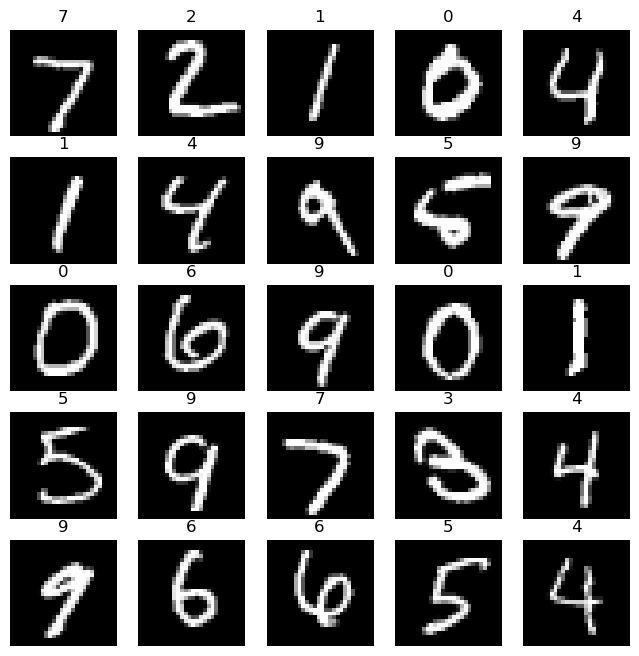

In [5]:
# printing first 25 x_test
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(y_test[i])

### Data preparation

In [6]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalize x_train, x_test

#### normalize by scaling ( 0 to 1 ) by dividing by 255 as the range is from 0 to 255

In [7]:
x_train = x_train / 255
x_test = x_test / 255

### Convert 2D data to 1D
#### Using Reshape or Flatten

In [8]:
x_train[0].shape, x_train[0].size

((28, 28), 784)

### Example with matrix for 2D to 1D

In [10]:
m = np.array([[6,3,1],[8,9,7]])
m

array([[6, 3, 1],
       [8, 9, 7]])

In [11]:
m.flatten()
# For 2 rows

array([6, 3, 1, 8, 9, 7])

In [12]:
m.reshape(m.size)
# For multiple rows

array([6, 3, 1, 8, 9, 7])

In [13]:
np.reshape(m, m.size)
# For multiple rows

array([6, 3, 1, 8, 9, 7])

In [14]:
x_train = x_train.reshape(-1, x_train[0].size)   # -1: Decides the non-zero dimentions and fill data for zero-dimentions
x_test = x_test.reshape(-1, x_test[0].size)

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### Prepare the output variable

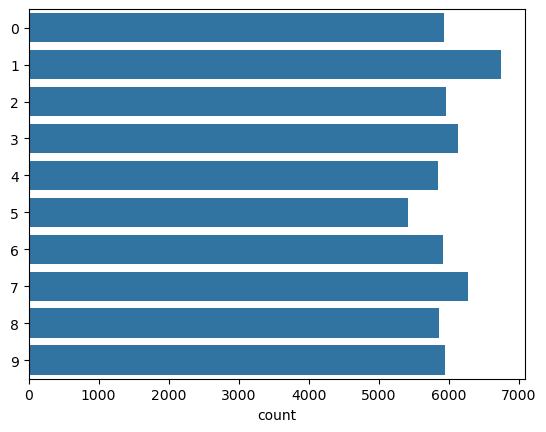

In [15]:
sns.countplot( y = y_train);

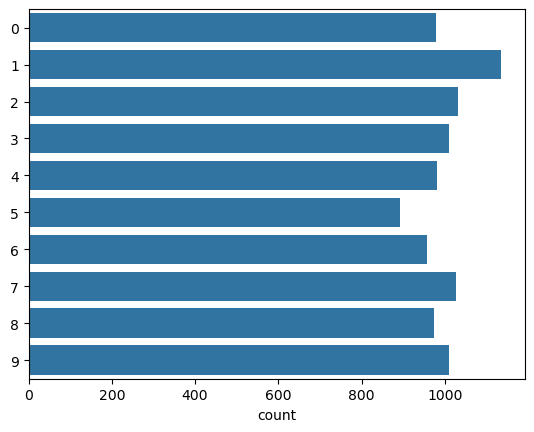

In [16]:
sns.countplot( y = y_test);

In [17]:
y_train.shape

(60000,)

In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
y_train

(60000, 10) (10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build the model

In [19]:
model = Sequential()

# input layer
model.add(Dense(512, input_shape=(784, ), activation='relu'))
# hidden layer
model.add(Dense(128, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))   # 10 multiclass

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [23]:
history = model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


6000/6000 [==============================] - 24s 4ms/step - loss: 0.1875 - accuracy: 0.9441
Epoch 2/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0892 - accuracy: 0.9728
Epoch 3/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0631 - accuracy: 0.9808
Epoch 4/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0496 - accuracy: 0.9847
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0422 - accuracy: 0.9877
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0362 - accuracy: 0.9892
Epoch 7/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0337 - accuracy: 0.9901
Epoch 8/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0304 - accuracy: 0.9914
Epoch 9/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0281 - accuracy: 0.9919
Epoch 10/10
6000/6000 [==============================] - 23s 4ms/step -

### Evaluate on test data

In [24]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 27s 3ms/step - loss: 0.1316 - accuracy: 0.9788


[0.13161757588386536, 0.9787999987602234]

### Predict on new image

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
new = x_test[1234]

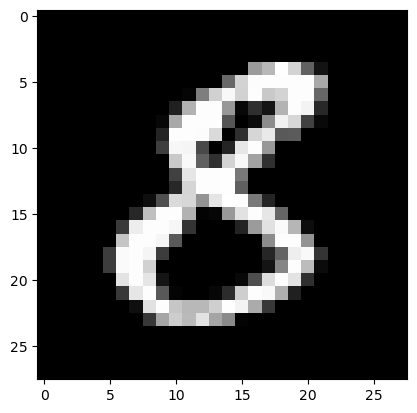

In [27]:
plt.imshow(new, cmap='gray');

In [28]:
new = new / 255
new = new.reshape(-1, new.size)
result = model.predict(new)
np.argmax(result)

1/1 [==============================] - 0s 152ms/step


8

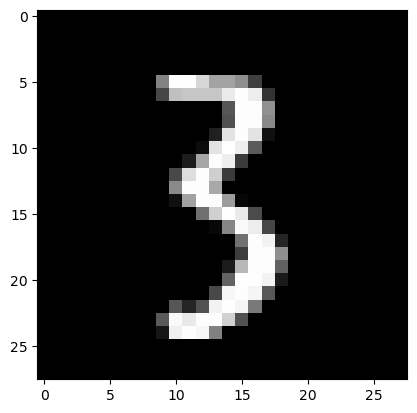

In [29]:
new1 = x_test[112]
plt.imshow(new1, cmap='gray');

In [30]:
new1 = new1 / 255
new1 = new1.reshape(-1, new1.size)
result1 = model.predict(new1)
np.argmax(result1)

1/1 [==============================] - 0s 31ms/step


3

### From images

40200 (201, 200)


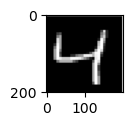

In [47]:
import cv2

# 1. Load the image in grayscale
image = cv2.imread('Four.png', 0)
print(image.size, image.shape)

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = 'gray');

In [48]:
# 2. Resize to 28, 28
image = cv2.resize(image, (28, 28))

In [49]:
# 3. Scale the Image
new_img = image / 255
# 4. Reshape 
new_img = new_img.reshape(-1, new_img.size)
# 5. Predict
result2 = model.predict(new_img)
# 6. Find Max
np.argmax(result2)

1/1 [==============================] - 0s 47ms/step


4